In [3]:
import os
import random

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt
import pandas as pd

## Get Data Streams

In [4]:
DATA_ROOT = "/Users/mauricio/Documents/development/projects/rhb-sensor-monitor/data"

file_list = os.listdir(DATA_ROOT)
file_list.sort()
file_groups = {}

for file in file_list:
    file_group = file.split("_")[0]
    if file_group not in file_groups:
        file_groups[file_group] = []
    file_groups[file_group].append(file)

sensor_data = {}

for file_group in file_groups:
    if file_group == "disk":
        continue
    if file_group == "heading":
        continue
    files = file_groups[file_group]
    for file in files:
        try:
            file_data = pd.read_csv(os.path.join(DATA_ROOT, file), parse_dates=["timestamp"])
            #file_data["x_tick"] = file_data["timestamp"].apply(lambda x: x.strftime("%H:%M"))
            file_data = file_data.set_index("timestamp")
            if file_group not in sensor_data:
                sensor_data[file_group] = file_data
            else:
                sensor_data[file_group] = pd.concat([sensor_data[file_group], file_data])  
        except:
            pass

## Generate Sample Position Data

In [19]:
#initial = 0.0
#sample = []
#for i in range(sensor_data["positions"]["lat"].shape[0]):
#    sample.append(initial)
#    initial = initial + random.randrange(-1.0, 1.0)
#sensor_data["positions"]["lat"] = sensor_data["positions"]["lat"] + sample
#initial = 0.0
#sample = []
#for i in range(sensor_data["positions"]["lat"].shape[0]):
#    sample.append(initial)
#    initial = initial + random.randrange(-1.0, 1.0)
#sensor_data["positions"]["lon"] = sensor_data["positions"]["lon"] + sample

In [20]:
sensor_data

{'positions':                                   lat         lon       alt
 timestamp                                                  
 2022-08-25 00:32:08.776145  37.850271 -122.253942    67.266
 2022-08-25 00:32:25.764886  37.850282 -122.253946    70.468
 2022-08-25 00:32:39.785812  37.850292 -122.253947    70.479
 2022-08-25 00:32:56.773587  37.850303 -122.253940    71.988
 2022-08-25 00:33:03.786308  37.850312 -122.253930    70.999
 ...                               ...         ...       ...
 2023-09-04 00:19:23.976514  40.779028 -119.216973  1191.928
 2023-09-04 00:19:39.978074  40.779005 -119.216975  1197.103
 2023-09-04 00:22:47.024747  40.778999 -119.216960  1191.765
 2023-09-04 00:23:56.043689  40.778983 -119.216986  1196.767
 2023-09-04 00:25:53.047877  40.779003 -119.216986  1191.662
 
 [38697 rows x 3 columns],
 'pressure':                              level
 timestamp                         
 2022-08-24 23:42:41.525759   -2043
 2022-08-25 00:32:07.800036   -2049
 2022-08-

## Plot Results

In [6]:
def display_sensor_data(start, end):
    for group in sensor_data:
        data_subset = sensor_data[group]
        data_subset = data_subset[(data_subset.index >= start) & (data_subset.index <= end)]
        if group == "positions":
            plt.plot(data_subset["lon"], data_subset["lat"])
        elif group == "temp":
            plt.plot(data_subset["temp_f"])
        else:
            plt.plot(data_subset[data_subset.columns])
        plt.title(group)
        plt.xticks(rotation=45)
        plt.show()
    #data_subset = sensor_data["pressure"]
    #data_subset = data_subset[(data_subset.index >= start) & (data_subset.index <= end)]
    #if group == "positions":
    #    plt.plot(data_subset["lon"], data_subset["lat"])
    #else:
    #    plt.plot(data_subset[data_subset.columns])
    #plt.title(group)
    #plt.xticks(rotation=45)
    #plt.show()

date_range = pd.date_range(start='8/20/2024', periods=1000, freq='60Min')

@interact
def slice_sensor_data(start=date_range, end=date_range):
    display_sensor_data(start, end)



interactive(children=(Dropdown(description='start', options=(Timestamp('2024-08-20 00:00:00', freq='60T'), Tim…

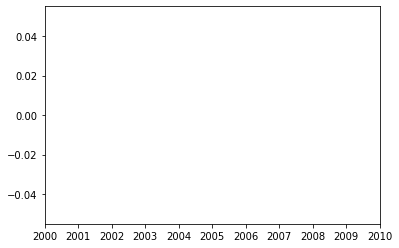

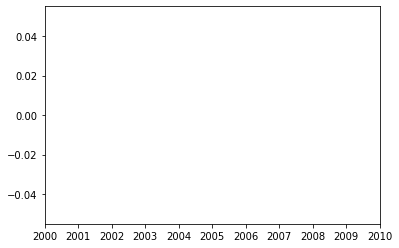

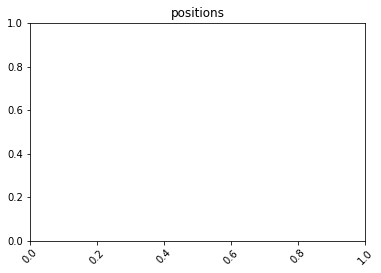

In [22]:
group = "positions"
data_subset = sensor_data[group]
#data_subset = data_subset[(data_subset.index >= pd.Timestamp('2022-08-23T0520')) & (data_subset.index <= pd.Timestamp('2022-08-23T0930'))]
#data_subset = data_subset[(data_subset.index >= pd.Timestamp('2022-08-24T0520'))]
data_subset = data_subset[(data_subset["lat"] < 40.81) & (data_subset["lon"] > 40.0)]
if group == "positions":
    #plt.scatter(data_subset["lon"], data_subset["lat"])
    plt.plot(data_subset["lat"])
    plt.show()
    plt.plot(data_subset["lon"])
    plt.show()
else:
    plt.plot(data_subset[data_subset.columns])
plt.title(group)
plt.xticks(rotation=45)
plt.show()


In [14]:
sensor_data["positions"].sort_index()

,lat,lon,alt
timestamp,,,
2022-08-17 03:09:29.067942,37.850341,-122.253912,76.997
2022-08-17 03:15:50.304166,37.850351,-122.253888,66.996
2022-08-17 03:54:22.330026,37.850361,-122.253845,56.929
2022-08-17 03:54:56.322874,37.850371,-122.253860,46.463
2022-08-17 03:55:46.319916,37.850381,-122.253848,56.537
...,...,...,...
2022-08-24 19:21:39.814534,40.785245,-119.217555,1177.708
2022-08-24 19:22:14.820007,40.785255,-119.217564,1187.726
2022-08-24 19:24:45.835646,40.785265,-119.217555,1197.770
